# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [654]:
# Import the appropriate libraries with aliases
import pandas as pd


# Create two new dataframes
north_df=pd.read_csv('C:\\Users\\Prasad\\Downloads\\jupyN\\CallC\\jupy\\callCenter\\Nc.csv')
south_df=pd.read_csv('C:\\Users\\Prasad\\Downloads\\jupyN\\CallC\\jupy\\callCenter\\Sc.csv')



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [655]:
#Code Used:
print(len(north_df.index))
north_df['Rep ID'].describe()
# 9 reps are in the North branch

245


count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

#### EDA Question 1B:  How many reps are in the South branch?  

In [656]:
#Code Used:
print(len(south_df.index))
#314
south_df['Rep ID'].describe()
# 11 reps are in the South branch

314


count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [657]:
#Code Used:
average_busy_minutes=round(north_df['Busy Minutes'].mean(),3)
average_not_ready_minutes=round(north_df['Not Ready Minutes'].mean(),3)
average_incoming_wait_time=round(north_df['Incoming Wait Time'].mean(),3)
average_during_call_wait_time=round(north_df['During Call Wait Time'].mean(),3)
print(f'Average Busy minutes is: {average_busy_minutes}, Average Not Ready Minutes is: {average_not_ready_minutes}, Average incoming wait time: {average_incoming_wait_time}, Average During call wait time: {average_during_call_wait_time}')


Average Busy minutes is: 9.988, Average Not Ready Minutes is: 1.914, Average incoming wait time: 3.049, Average During call wait time: 2.967


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [658]:
#Code Used:
average_busy_minutes=round(south_df['Busy Minutes'].mean(),3)
average_not_ready_minutes=round(south_df['Not Ready Minutes'].mean(),3)
average_incoming_wait_time=round(south_df['Incoming Wait Time'].mean(),3)
average_during_call_wait_time=round(south_df['During Call Wait Time'].mean(),3)
print(f'Average Busy minutes is: {average_busy_minutes}, Average Not Ready Minutes is: {average_not_ready_minutes}, Average incoming wait time: {average_incoming_wait_time}, Average During call wait time: {average_during_call_wait_time}')

Average Busy minutes is: 10.054, Average Not Ready Minutes is: 1.911, Average incoming wait time: 3.0, Average During call wait time: 3.076


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [659]:
#Code Used:
south_timeblock=south_df.groupby('Time Block',sort=True)['Calls'].count()
south_timeblock
north_timeblock=north_df.groupby('Time Block')['Calls'].count()
north_timeblock
pd.concat([south_timeblock,north_timeblock],axis=1)
pd.concat([south_timeblock,north_timeblock],axis=1).sum(axis=1)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Average Busy Minutes = 9.99 
> - Average Not Ready Minutes = 1.91
> - Average Incoming Wait Time = 3.05
> - Average During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Average Busy Minutes = 10.05
> - Average Not Ready Minutes = 1.91
> - Average Incoming Wait Time = 3.0
> - Average During Call Wait Time = 3.076
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, there is missing data in the 'incoming call wait time' coloumn in both data sets (seen in heat map). This data represents the "outgoing" calls which do not have an incoming wait time, so this missing data is expected and will not be imputed or deleted

In [660]:
north_df.shape

(245, 15)

In [661]:
south_df.shape

(314, 15)

In [662]:
# Code Used
# Add Additional Cells as needed.
north_df.isnull().sum()
#163 empty values in Incoming Wait Time column

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [663]:
import numpy as np
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


<Axes: >

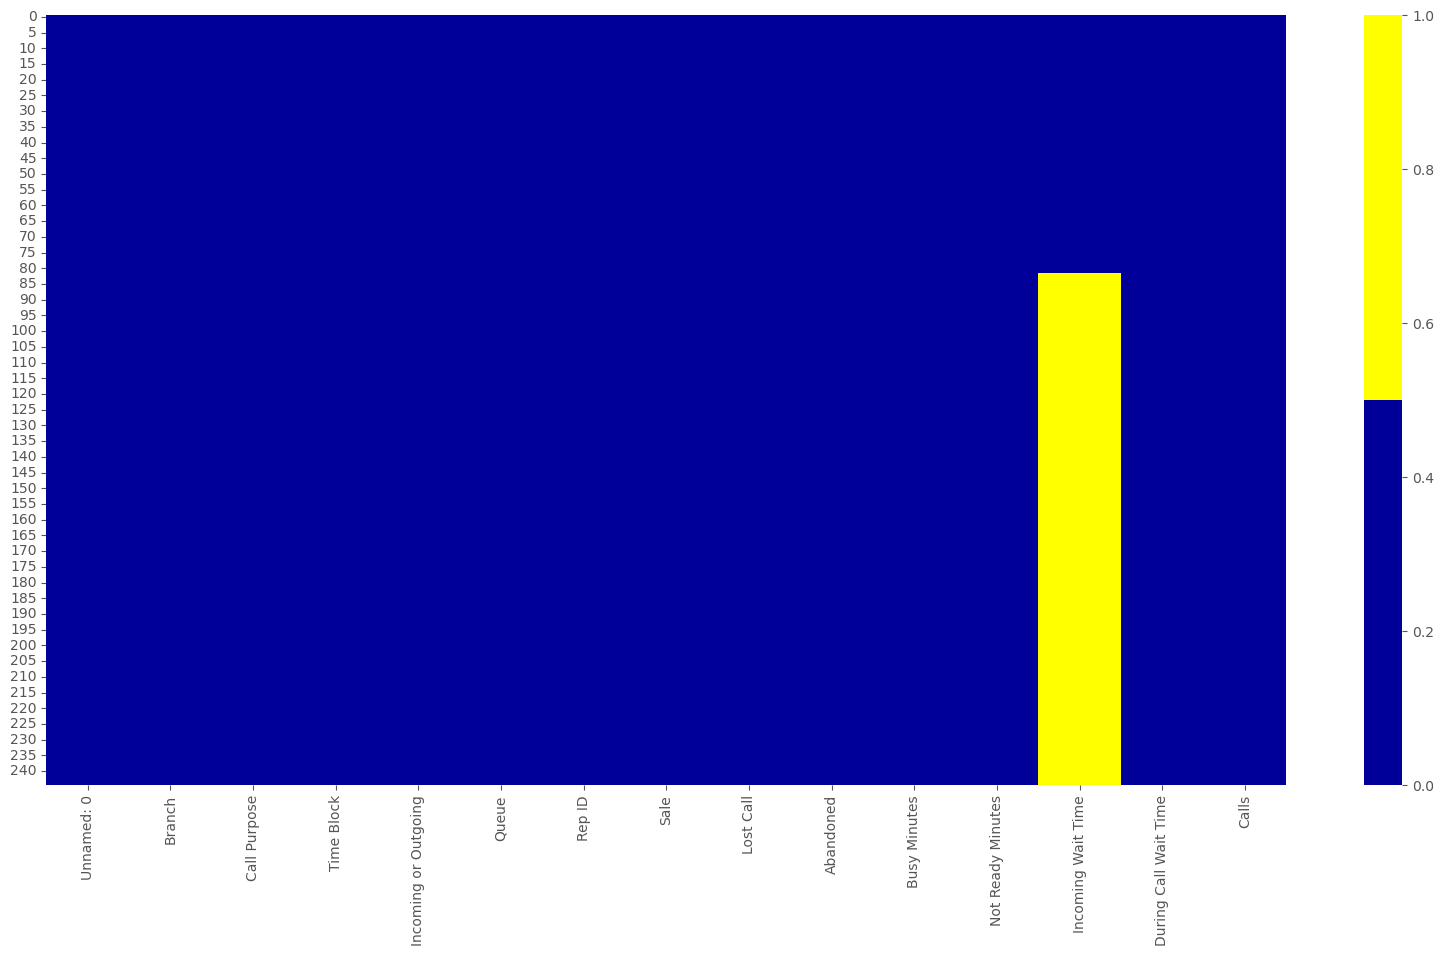

In [664]:
import seaborn as sns
cols = north_df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))

In [665]:
# Checking the descriptive statistics on the varaible 'Incoming Wait Time' with missing data in the North Branch - looking for outliers
north_df['Incoming Wait Time'].describe()

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

<Axes: >

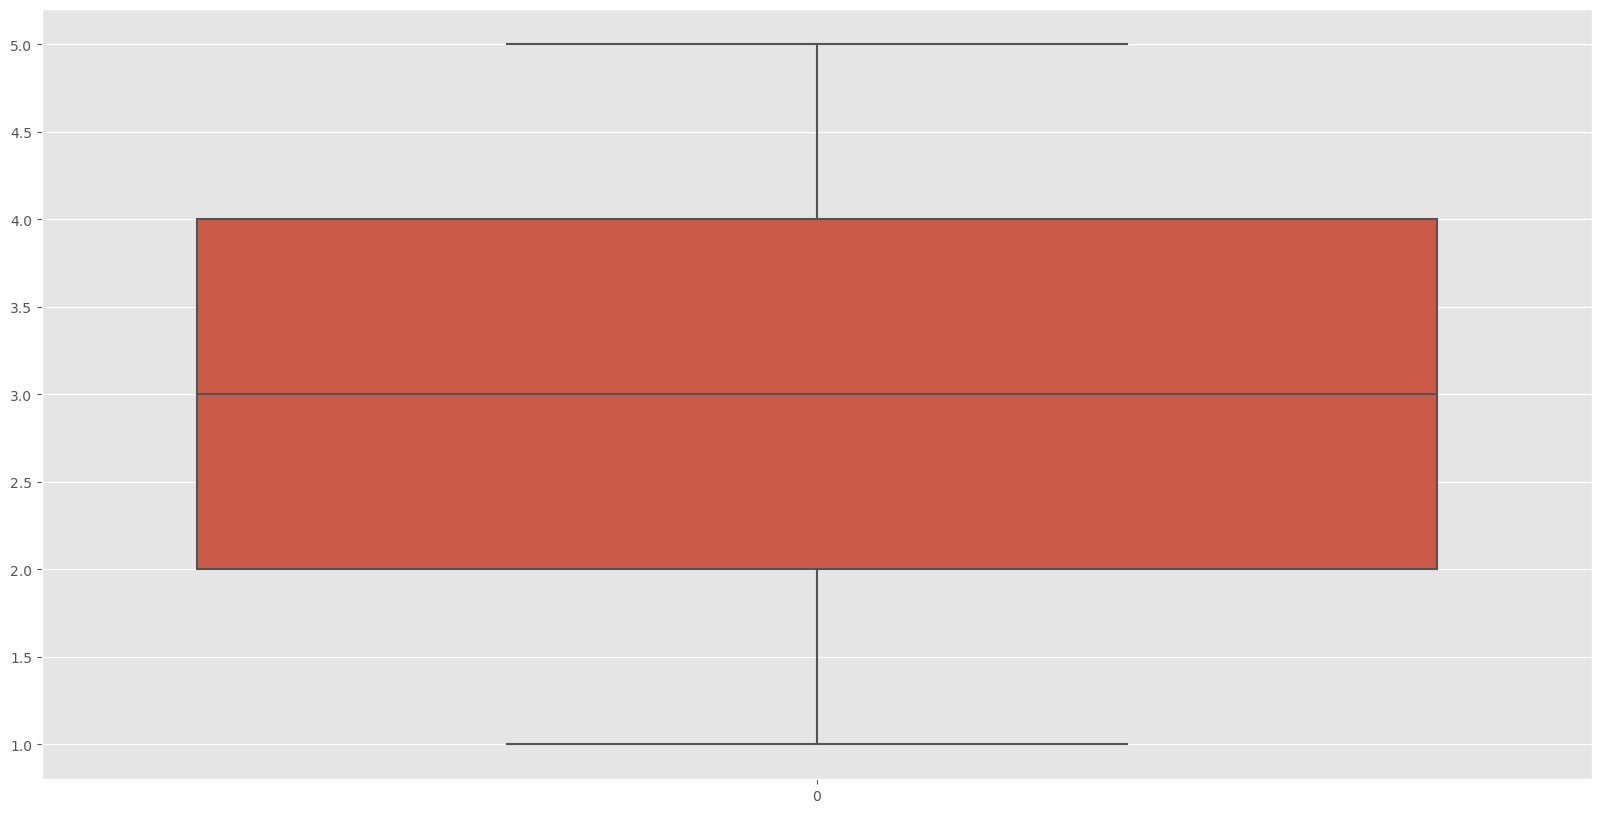

In [666]:
# Checking the distribtion on the varaible 'Incoming Wait Time' with missing data in the North Branch - looking for skew and non-randomness
sns.boxplot(data=north_df['Incoming Wait Time'])

In [667]:
south_df.isnull().sum()
#188 null values in Incoming Wait Time column

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [668]:
# Checking the percent missing data in the South Branch
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


<Axes: >

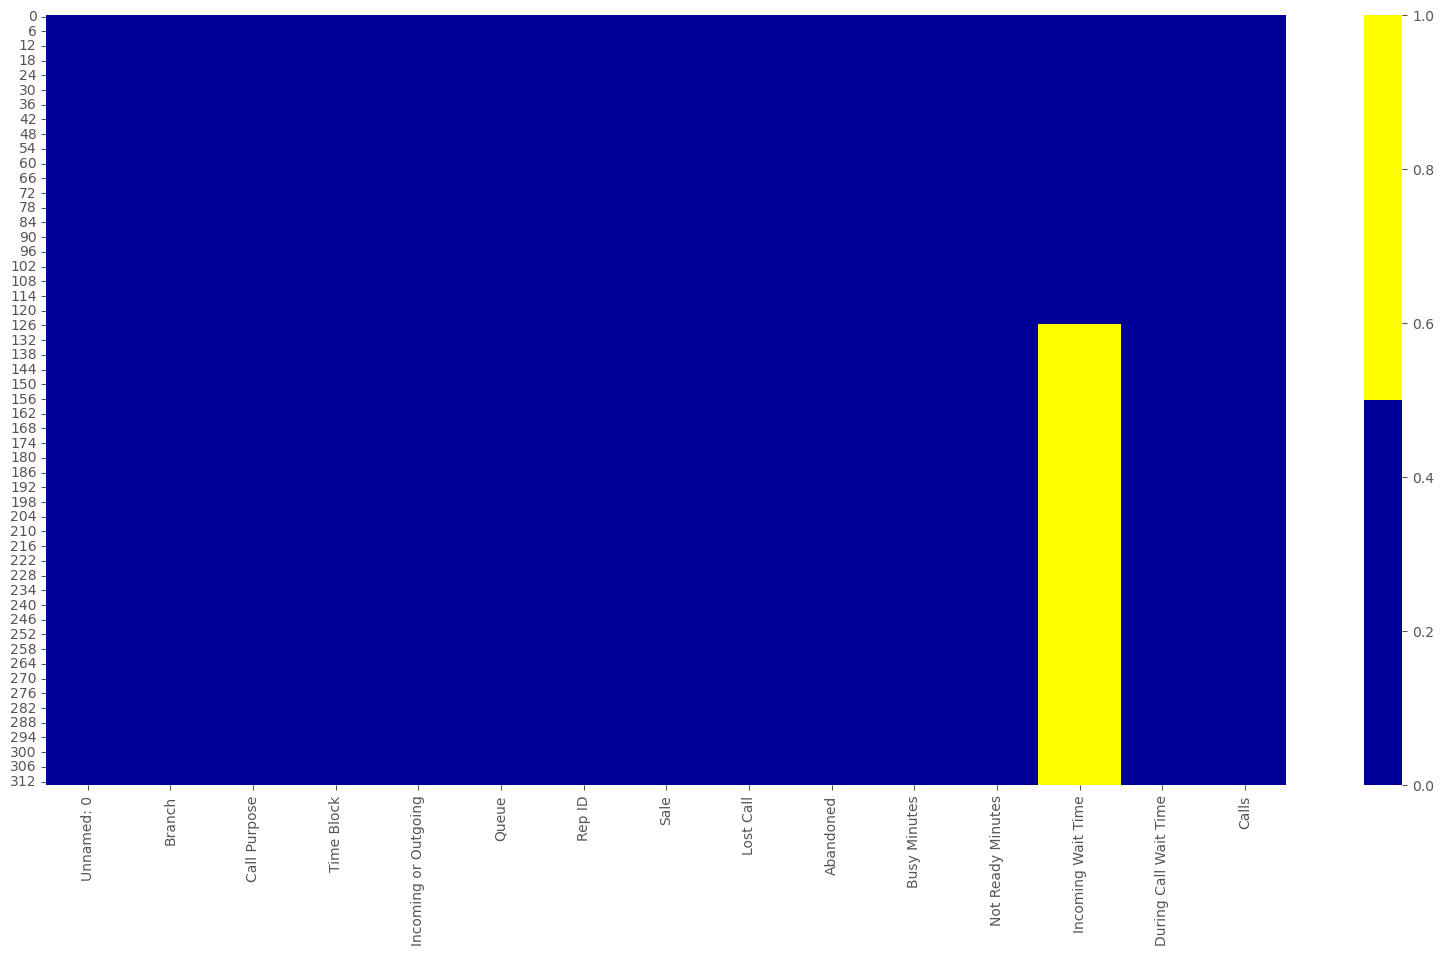

In [669]:
cols = north_df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))

In [670]:
# Checking the descriptive statistics on the varaible 'Incoming Wait Time' with missing data in the South Branch - looking for outliers
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

<Axes: >

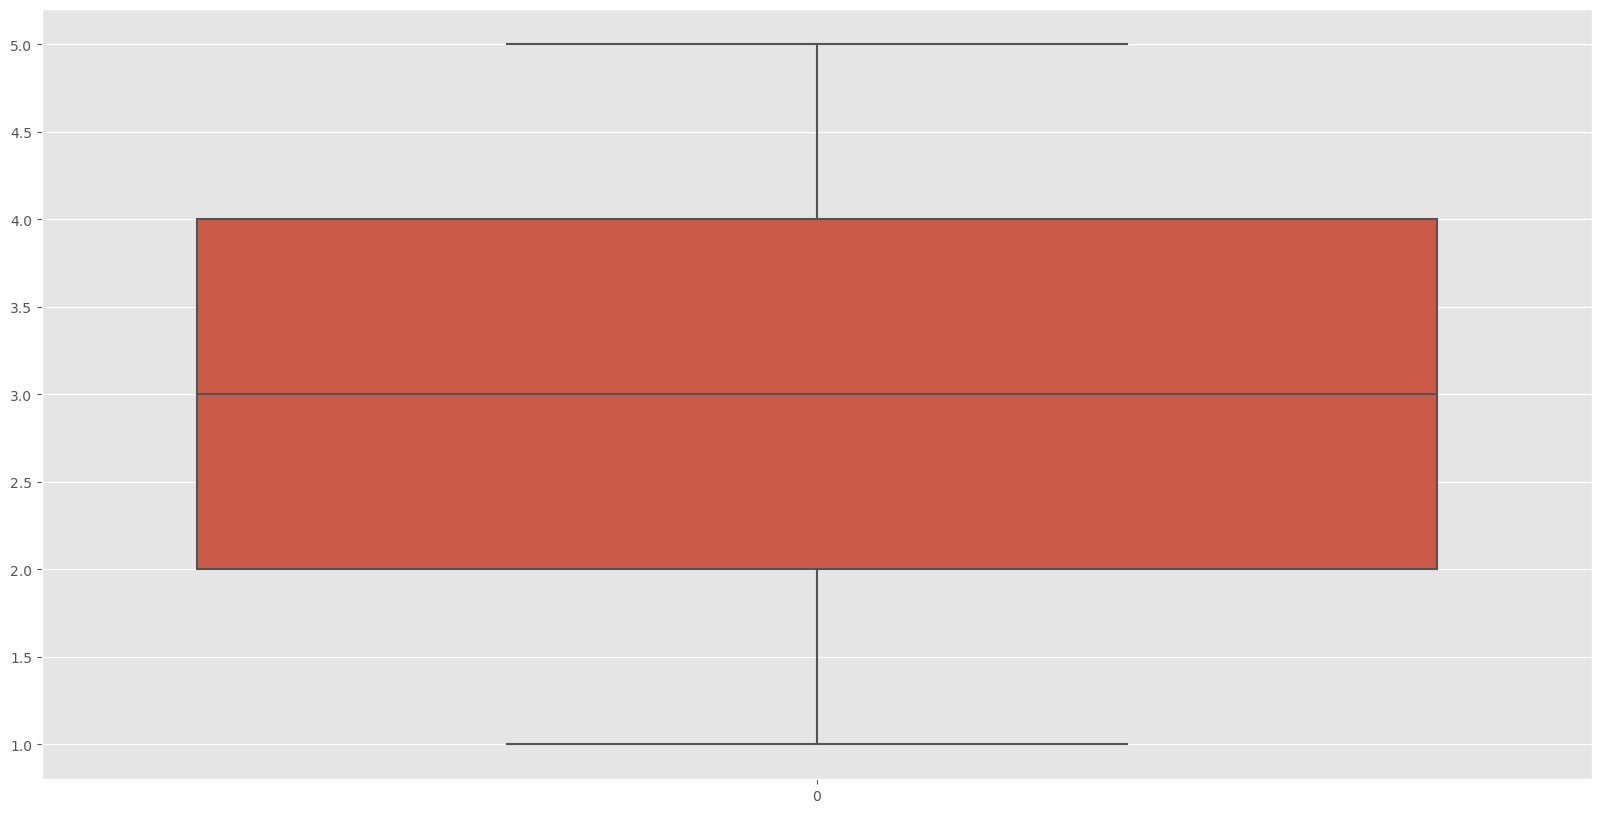

In [671]:
# Checking the distribtion on the varaible 'Incoming Wait Time' with missing data in the South Branch - looking for skew and non-randomness
sns.boxplot(data=south_df['Incoming Wait Time'])

In [672]:
north_df.tail(60)

Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
185         185  North  Product Support    2:00 PM             Outgoing     A   
186         186  North  Product Support    2:00 PM             Outgoing     B   
187         187  North  Product Support    2:00 PM             Outgoing     A   
188         188  North  Product Support    2:00 PM             Outgoing     A   
189         189  North  Product Support    2:00 PM             Outgoing     B   
190         190  North  Product Support    2:00 PM             Outgoing     B   
191         191  North  Product Support    2:00 PM             Outgoing     A   
192         192  North  Product Support    2:00 PM             Outgoing     B   
193         193  North  Product Support    2:00 PM             Outgoing     A   
194         194  North  Product Support    2:00 PM             Outgoing     B   
195         195  North  Product Support    2:00 PM             Outgoing     B   
196         196  North  Product Support    2:00 PM             Outgoing     B   
197         197  North  Product Support    2:00 PM             Outgoing     B   
198         198  North  Product Support    2:00 PM             Outgoing     B   
199         199  North  Product Support    2:00 PM             Outgoing     B   
200         200  North  Product Support    2:00 PM             Outgoing     A   
201         201  North  Product Support    2:00 PM             Outgoing     A   
202         202  North  Product Support    2:00 PM             Outgoing     A   
203         203  North  Product Support    3:00 PM             Outgoing     B   
204         204  North  Product Support    3:00 PM             Outgoing     A   
205         205  North  Product Support    3:00 PM             Outgoing     B   
206         206  North  Product Support    3:00 PM             Outgoing     B   
207         207  North  Product Support    3:00 PM             Outgoing     B   
208         208  North  Product Support    3:00 PM             Outgoing     A   
209         209  North  Product Support    3:00 PM             Outgoing     A   
210         210  North  Product Support    3:00 PM             Outgoing     B   
211         211  North  Product Support    3:00 PM             Outgoing     B   
212         212  North  Product Support    3:00 PM             Outgoing     A   
213         213  North  Product Support    3:00 PM             Outgoing     B   
214         214  North  Product Support    3:00 PM             Outgoing     B   
215         215  North  Product Support    3:00 PM             Outgoing     B   
216         216  North  Product Support    3:00 PM             Outgoing     B   
217         217  North  Product Support    3:00 PM             Outgoing     B   
218         218  North  Product Support    3:00 PM             Outgoing     B   
219         219  North  Product Support    3:00 PM             Outgoing     A   
220         220  North  Product Support    4:00 PM             Outgoing     A   
221         221  North  Product Support    4:00 PM             Outgoing     B   
222         222  North  Product Support    4:00 PM             Outgoing     A   
223         223  North  Product Support    4:00 PM             Outgoing     B   
224         224  North  Product Support    4:00 PM             Outgoing     B   
225         225  North  Product Support    4:00 PM             Outgoing     B   
226         226  North  Product Support    4:00 PM             Outgoing     B   
227         227  North  Product Support    4:00 PM             Outgoing     B   
228         228  North  Product Support    4:00 PM             Outgoing     B   
229         229  North  Product Support    4:00 PM             Outgoing     B   
230         230  North  Product Support    4:00 PM             Outgoing     B   
231         231  North  Product Support    4:00 PM             Outgoing     A   
232         232  North  Product Support    4:00 PM             Outgoing     B   
233         233  North  Product Supp

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I used a bargraph to see the different responses because there were so many 'NO' responses that .head was only showing me 'NO.' By using a bar graph, I could see that a very small amount of resposnes were 'YES' with an extra space. I use string stip to stip the white space and re-ran my bar graph to confirm that there are now only two responses.

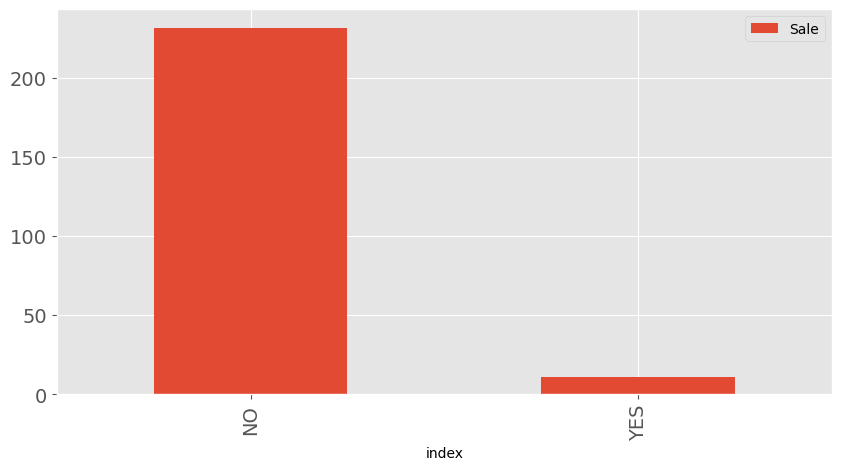

In [904]:
#Code Used
# Add Additional Cells as needed.
#Bar graph of 'Sale' distribution
north_df['Sale'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='Sale',fontsize=14)
# Stripping white space from values of 'Sale'
north_df['Sale'] = north_df['Sale'].str.strip()

<Axes: xlabel='index'>

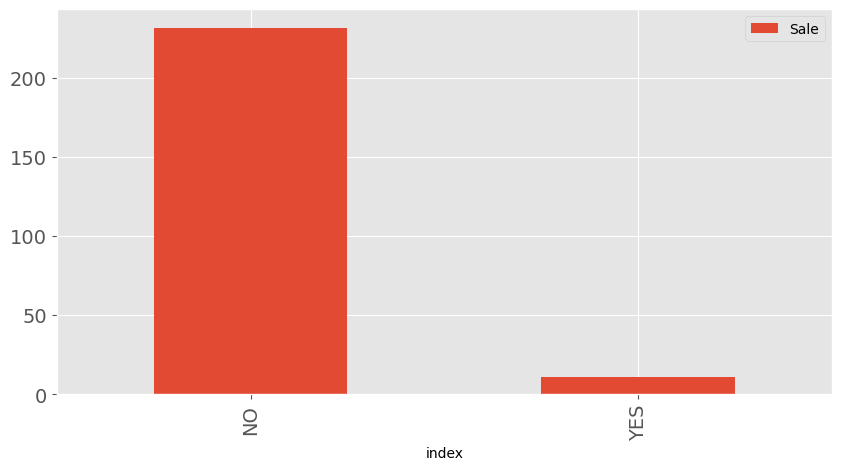

In [905]:
#Check bar graph of 'Sale' again to make sure only two values are present - yes and no.
north_df['Sale'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='Sale',fontsize=14)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: there are two duplicates in north dataset, three duplicates in south dataset and I drop the duplicates.

In [675]:
north_df.shape

(245, 15)

In [676]:
#Code Used
# Add Additional Cells as needed.
south_df.duplicated().sum()
#No duplicates in the data sets
north_df.duplicated().sum()
#Checking for duplicates in the north branch - there are 2
# north_df_dedupped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()

# print(north_df.shape)
# print(north_df_dedupped.shape)
north_df.drop_duplicates()
north_df.shape
#(245, 15)
#drop unnamed column
north_df=north_df.drop('Unnamed: 0', axis=1)
north_df.shape
north_df.head()
north_df.duplicated().sum()
#there are two duplicates in north dataset

2

In [677]:
#Finding the duplicate rows
north_df[north_df.duplicated()]

Branch   Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
50   North  Sales Support   12:00 PM             Incoming     A     Joe   NO   
105  North  Sales Support   10:00 AM             Outgoing     A  Amanda   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
50           0          0            10                  1   
105          0          0            11                  2   

     Incoming Wait Time  During Call Wait Time  Calls  
50                  4.0                      3      1  
105                 NaN                      2      1

In [678]:
#drop duplicates
north_df=north_df.drop_duplicates()

north_df.shape


(243, 14)

In [679]:
south_df.head()

Unnamed: 0 Branch   Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  South  Sales Support   10:00 AM             Incoming     D   
1           1  South  Sales Support   10:00 AM             Incoming     C   
2           2  South  Sales Support   10:00 AM             Incoming     C   
3           3  South  Sales Support   10:00 AM             Incoming     C   
4           4  South  Sales Support   12:00 PM             Incoming     C   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0   Kate   NO          0          0             9                  1   
1   Eric   NO          0          0             8                  2   
2  Susan   NO          0          0            10                  2   
3  Alice   NO          0          0            12                  1   
4  Sandy   NO          0          0             8                  3   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                      2      1  
1                 1.0                      4      1  
2                 1.0                      4      1  
3                 1.0                      3      1  
4                 1.0                      3      1

In [680]:
south_df.shape

(314, 15)

In [681]:
#drop unnamed column
south_df=south_df.drop('Unnamed: 0', axis=1)
south_df.shape
south_df.head()
south_df.duplicated().sum()
#there are three duplicates in north dataset

3

In [682]:
#Finding the duplicate rows
south_df[south_df.duplicated()]

Branch   Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
58   South  Sales Support   12:00 PM             Incoming     D   Kate   NO   
170  South  Sales Support   11:00 AM             Outgoing     D  Randy   NO   
180  South  Sales Support   12:00 PM             Outgoing     C  Sandy   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
58           0          0             8                  1   
170          0          0             8                  3   
180          0          0             8                  1   

     Incoming Wait Time  During Call Wait Time  Calls  
58                  3.0                      3      1  
170                 NaN                      2      1  
180                 NaN                      4      1

In [683]:
#drop duplicates
south_df=south_df.drop_duplicates()

south_df.shape

(311, 14)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The 'Unnammed: 0' column was an unnessary repeat of the index value. This column was dropped when addressing duplicate rows

In [684]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [685]:
# Create dataframe for the entire company named df

df=pd.concat([north_df,south_df],ignore_index=True)
df.shape

(554, 14)

In [686]:
df.head()

Branch     Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
0  North        Complaint    9:00 AM             Incoming     B  Brent   NO   
1  North    Sales Support   11:00 AM             Incoming     A    Cam   NO   
2  North    Sales Support   11:00 AM             Incoming     B   Todd   NO   
3  North    Sales Support    4:00 PM             Incoming     B  Brent   NO   
4  North  Product Support   12:00 PM             Incoming     B  Brent   NO   

   Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
0          0          1             9                  2                 1.0   
1          0          0            11                  1                 1.0   
2          0          0             9                  3                 1.0   
3          0          0            11                  2                 1.0   
4          0          0             8                  2                 1.0   

   During Call Wait Time  Calls  
0                      4      1  
1                      3      1  
2                      3      1  
3                      4      1  
4                      4      1

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [687]:
# Code Used
# Add Additional Cells as needed.
df.groupby('Rep ID', group_keys=True).apply(lambda x: x)

Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
Rep ID                                                                     
Alice  246  South    Sales Support   10:00 AM             Incoming     C   
       256  South  Product Support    5:00 PM             Incoming     C   
       278  South  Product Support    5:00 PM             Incoming     C   
       302  South    Sales Support    1:00 PM             Incoming     C   
       306  South  Product Support   10:00 AM             Incoming     C   
...           ...              ...        ...                  ...   ...   
Xander 221  North  Product Support    4:00 PM             Outgoing     B   
       222  North  Product Support    4:00 PM             Outgoing     B   
       224  North  Product Support    4:00 PM             Outgoing     B   
       231  North  Product Support    4:00 PM             Outgoing     B   
       242  North  Product Support    5:00 PM             Outgoing     B   

            Rep ID Sale  Lost Call  Abandoned  Busy Minutes  \
Rep ID                                                        
Alice  246   Alice   NO          0          0            12   
       256   Alice   NO          0          0            11   
       278   Alice   NO          0          0            10   
       302   Alice   NO          0          0             8   
       306   Alice   NO          0          0            10   
...            ...  ...        ...        ...           ...   
Xander 221  Xander   NO          0          0            11   
       222  Xander   NO          0          0            12   
       224  Xander   NO          0          0             9   
       231  Xander   NO          0          0             9   
       242  Xander   NO          0          0             8   

            Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Rep ID                                                                     
Alice  246                  1                 1.0                      3   
       256                  3                 1.0                      3   
       278                  3                 2.0                      4   
       302                  2                 3.0                      3   
       306                  3                 3.0                      2   
...                       ...                 ...                    ...   
Xander 221                  3                 NaN                      4   
       222                  1                 NaN                      2   
       224                  2                 NaN                      3   
       231                  2                 NaN                      4   
       242                  1                 NaN                      4   

            Calls  
Rep ID             
Alice  246      1  
       256      1  
       278      1  
       302      1  
       306      1  
...           ...  
Xander 221      1  
       222      1  
       224      1  
       231      1  
       242      1  

[554 rows x 14 columns]

In [688]:
df.groupby(['Rep ID','Branch']).sum().sort_values(by=['Calls'],ascending=False)

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\2544600873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Rep ID','Branch']).sum().sort_values(by=['Calls'],ascending=False)


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID Branch                                                          
Brent  North           0          1           362                 71   
Eric   South           0          0           361                 54   
Randy  South           3          1           312                 63   
Sandy  South           1          0           317                 59   
Helga  South           0          2           292                 58   
Lilly  North           0          2           307                 59   
Todd   North           1          0           296                 58   
Duke   North           2          0           292                 56   
George South           0          0           298                 53   
Karl   South           1          0           287                 61   
Kate   South           0          0           283                 60   
Josh   South           3          0           260                 50   
Susan  South           2          0           267                 53   
Joe    North           0          0           246                 48   
Sharon South           1          1           257                 38   
Xander North           1          0           244                 44   
Cam    North           1          0           233                 46   
Andy   North           0          3           228                 43   
Amanda North           0          1           218                 41   
Alice  South           0          0           199                 46   

               Incoming Wait Time  During Call Wait Time  Calls  
Rep ID Branch                                                    
Brent  North                 17.0                    117     37  
Eric   South                 47.0                    112     35  
Randy  South                 47.0                     96     32  
Sandy  South                 34.0                     96     31  
Helga  South                 36.0                     95     31  
Lilly  North                 37.0                     88     30  
Todd   North                 21.0                     97     29  
Duke   North                 39.0                     85     29  
George South                 41.0                     87     29  
Karl   South                 26.0                     85     28  
Kate   South                 34.0                     80     28  
Josh   South                 31.0                     83     26  
Susan  South                 35.0                     88     26  
Joe    North                 32.0                     78     25  
Sharon South                 29.0                     77     25  
Xander North                 20.0                     68     24  
Cam    North                 32.0                     66     24  
Andy   North                 36.0                     65     23  
Amanda North                 12.0                     58     22  
Alice  South                 15.0                     58     20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.29%
- Company Wide =1.99%
- Do any of these fall out of the optimal range of 2-5%? The South Branch (1.29%) exceeds expectations with a rate lower than 2%

In [689]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch']).sum()

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\1377172342.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Branch']).sum()


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch                                                          
North           5          7          2426                466   
South          11          4          3133                595   

        Incoming Wait Time  During Call Wait Time  Calls  
Branch                                                    
North                246.0                    722    243  
South                375.0                    957    311

In [690]:
average_Abandoned_calls=round(df['Abandoned'].mean()*100,2)
print(f'average_Abandoned_calls in company wide is {average_Abandoned_calls}%')

average_Abandoned_calls in company wide is 1.99%


In [691]:
average_Abandoned_calls_north=round(north_df['Abandoned'].mean()*100,2)
print(f'average_Abandoned_calls in north is {average_Abandoned_calls_north}%')

average_Abandoned_calls in north is 2.88%


In [692]:
average_Abandoned_calls_south=round(south_df['Abandoned'].mean()*100,2)
print(f'average_Abandoned_calls in south is {average_Abandoned_calls_south}%')

average_Abandoned_calls in south is 1.29%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.58%
- South Branch = 15.43%
- Company Wide = 14.62%

In [693]:
# Code Used
# Add Additional Cells as needed.
Number_of_calls_answered_two_seconds=north_df[north_df['Incoming Wait Time']<=2.0]
Service_level=round((Number_of_calls_answered_two_seconds['Calls'].count()/north_df['Calls'].count())*100,2)
Service_level
print(f'percentage of calls answered in two seconds North is {Service_level}%')

percentage of calls answered in two seconds North is 13.58%


In [694]:
Number_of_calls_answered_two_seconds=south_df[south_df['Incoming Wait Time']<=2.0]
Service_level=round((Number_of_calls_answered_two_seconds['Calls'].count()/south_df['Calls'].count())*100,2)
Service_level
print(f'percentage of calls answered in two seconds South is {Service_level}%')

percentage of calls answered in two seconds South is 15.43%


In [695]:
Number_of_calls_answered_two_seconds=df[df['Incoming Wait Time']<=2.0]
Service_level=round((Number_of_calls_answered_two_seconds['Calls'].count()/df['Calls'].count())*100,2)
Service_level
print(f'percentage of calls answered in two seconds companywide is {Service_level}%')


percentage of calls answered in two seconds companywide is 14.62%


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.01 seconds


In [696]:
# Code Used 
Average_speed_of_answer_minutes_companywide=round(df['Incoming Wait Time'].agg('mean'),2)
Average_speed_of_answer_minutes_companywide
print(f'Average speed of answer in seconds companywide is {Average_speed_of_answer_minutes_companywide} seconds')

Average speed of answer in seconds companywide is 3.01 seconds


In [697]:
Average_speed_of_answer_minutes_north_callcenter=round(north_df['Incoming Wait Time'].agg('mean'),2)
Average_speed_of_answer_minutes_north_callcenter
print(f'Average speed of answer seconds in north callcenter is {Average_speed_of_answer_minutes_north_callcenter} seconds')

Average speed of answer seconds in north callcenter is 3.04 seconds


In [698]:
Average_speed_of_answer_minutes_south_callcenter=round(south_df['Incoming Wait Time'].agg('mean'),2)
Average_speed_of_answer_minutes_south_callcenter
print(f'Average speed of answer seconds in south callcenter is {Average_speed_of_answer_minutes_south_callcenter} seconds')

Average speed of answer seconds in south callcenter is 3.0 seconds


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I picked a bar graph because it a simple way to compare frequencies across a small number of variables. In this case, it was easy to compare the percentage rates across the 4 different queues. This graph is a good option for comparing distributions with a small group

In [910]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
queue_dict
for i in range(len(queues)):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates
#Your Code Here:




C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\853142704.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


{'A': 0.0425531914893617,
 'B': 0.020134228187919462,
 'C': 0.0072992700729927005,
 'D': 0.017241379310344827}

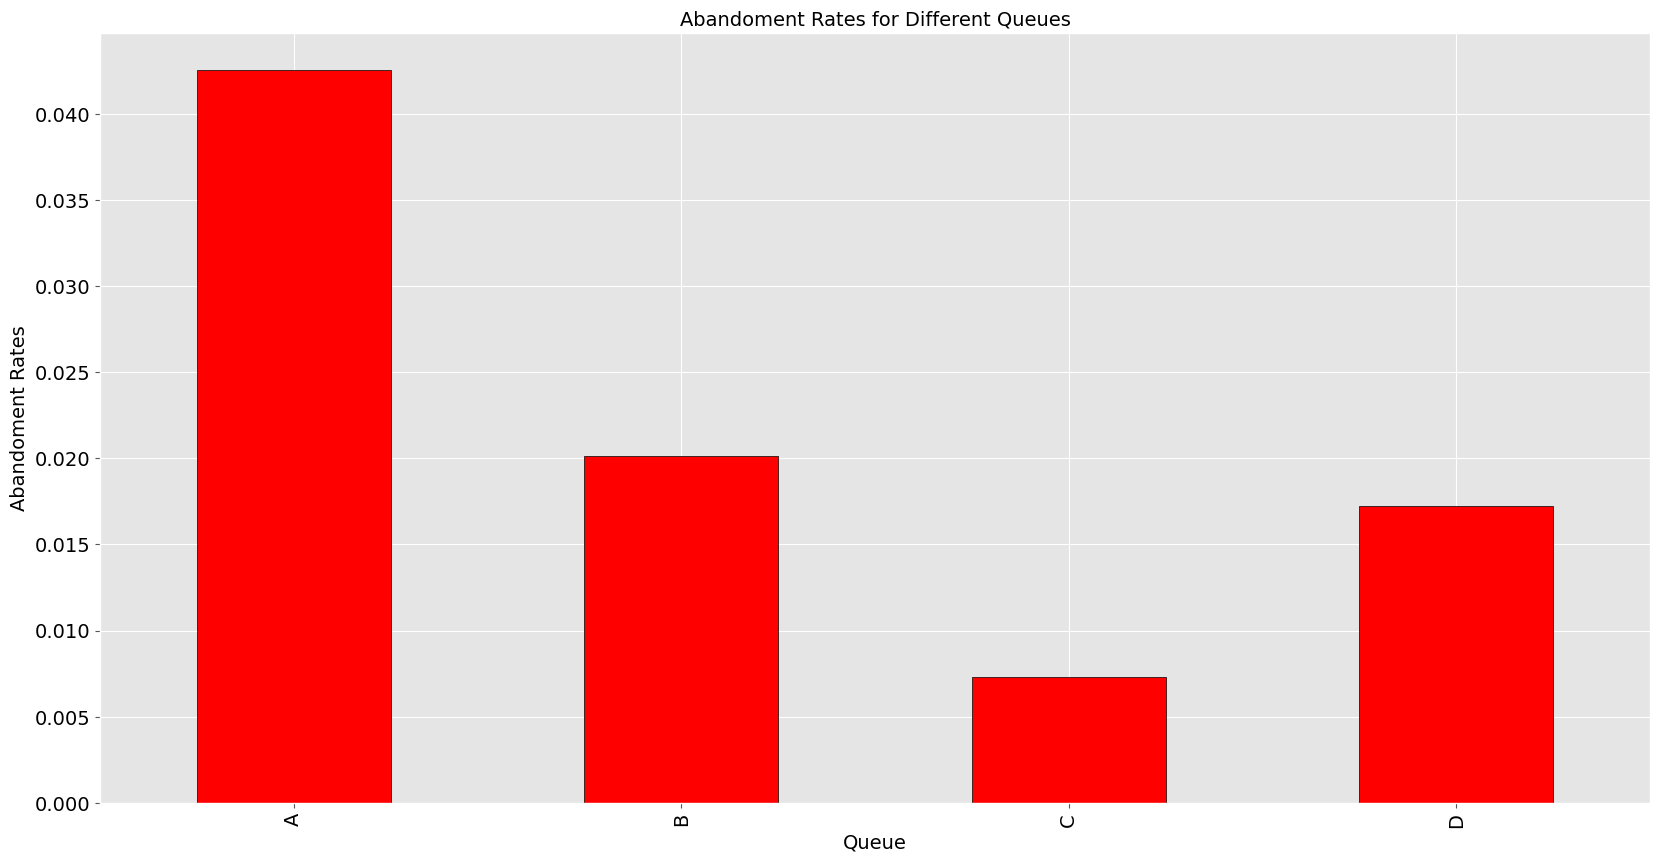

In [912]:
import pandas as pd
#abandonment_rates_df = pd.DataFrame(abandonment_rates.values(), abandonment_rates.keys())
abandonment_rates_df = pd.Series(abandonment_rates)
abandonment_rates_df.plot(kind = 'bar', legend = False,color='red',edgecolor='black',fontsize=14)
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Abandoment Rates for Different Queues',color = 'black',fontsize=14)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black',fontsize=14)
plt.ylabel('Abandoment Rates',color = 'black',fontsize=14)
plt.savefig('AvgAbandonRateQueue.png')
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used bar chart for both the charts, because there are not too many repID's to draw.

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.555556
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2        9        22.222222
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333
        Service Level %
Rep ID                 
Amanda        60.000000
Andy          30.000000
Brent         75.000000
Cam           45.454545
Duke          42.857143
Joe           22.222222
Lilly         33.333333
Todd          33.33333

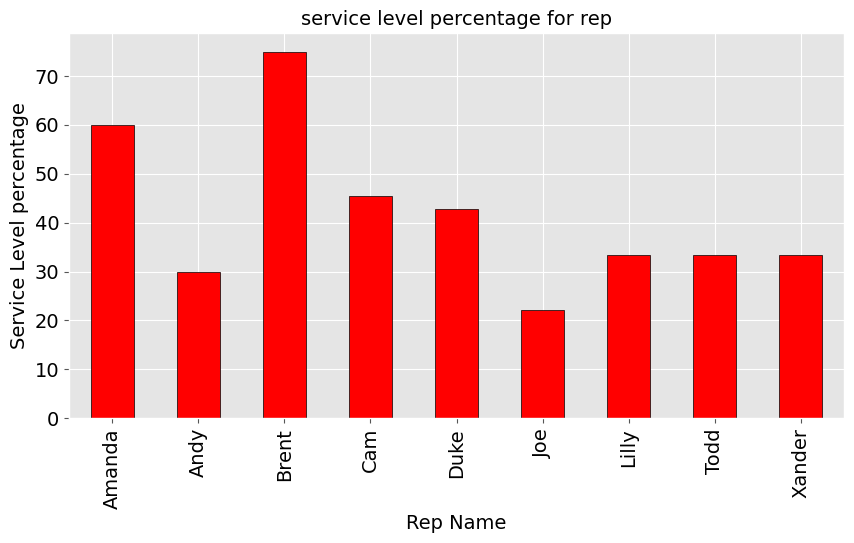

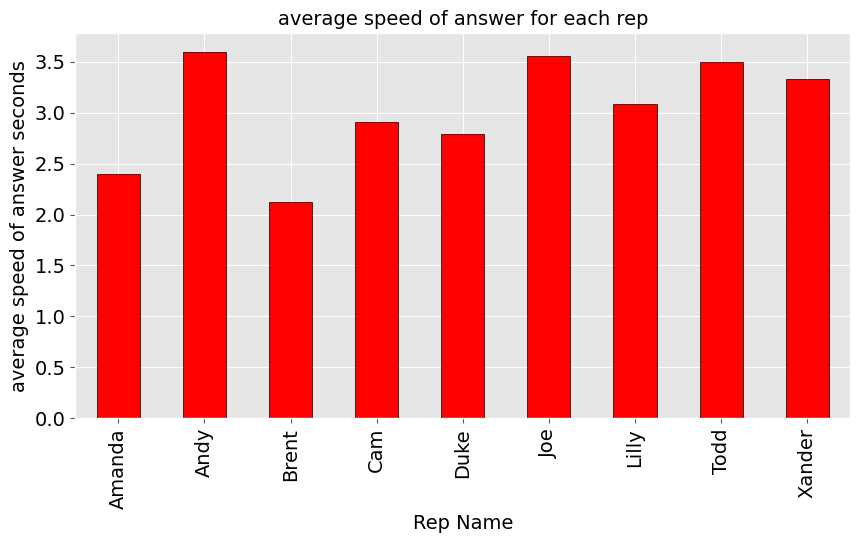

In [804]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby('Rep ID')['Incoming Wait Time'].mean().to_frame().reset_index()
print(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df['Incoming Wait Time'] <= 2.0]
quick_reps = quick_calls[['Rep ID', 'Calls']]
quick_stats = quick_reps.groupby(['Rep ID']).sum()  # Final Table

#print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df['Incoming or Outgoing'] == 'Incoming']
rep_calls = total_calls_in[['Rep ID', 'Calls']]    
total_stats = rep_calls.groupby(['Rep ID']).sum() # Final Table  
#print(total_stats)

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on='Rep ID')
#print(service_level)

# Create Percentage Column in Table 3
service_level['Service Level %'] = service_level['Calls_x']/service_level['Calls_y'] * 100
print(service_level)
#Your Code Here:
service_level_percentage_for_each_rep_df = service_level[['Service Level %']]
print(service_level_percentage_for_each_rep_df)
service_level_percentage_for_each_rep_df.plot(kind = 'bar', legend = False,color='red',edgecolor='black')
# import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,20)
plt.title('service level percentage for rep',color = 'black',fontsize=14)
plt.xticks(color = 'black',fontsize=14)
plt.yticks(color = 'black',fontsize=14)
plt.xlabel('Rep Name',color = 'black',fontsize=14)
plt.ylabel('Service Level percentage',color = 'black',fontsize=14)
plt.savefig('service_level_percentage_for_each_rep_df.png')
plt.show()
plt.rcParams['figure.figsize'] = (10,5)
north_plt.plot(kind = 'bar',x='Rep ID',y='Incoming Wait Time', legend = False,color='red',edgecolor='black')
plt.title('average speed of answer for each rep',color = 'black',fontsize=14)
plt.xticks(color = 'black',fontsize=14)
plt.yticks(color = 'black',fontsize=14)
plt.xlabel('Rep Name',color = 'black',fontsize=14)
plt.ylabel('average speed of answer seconds',color = 'black',fontsize=14)
plt.savefig('average_speed_of_answer_for_each_rep_df.png')
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 120, 'Incoming': 73}
{'Outgoing': 228, 'Incoming': 82}


<Axes: >

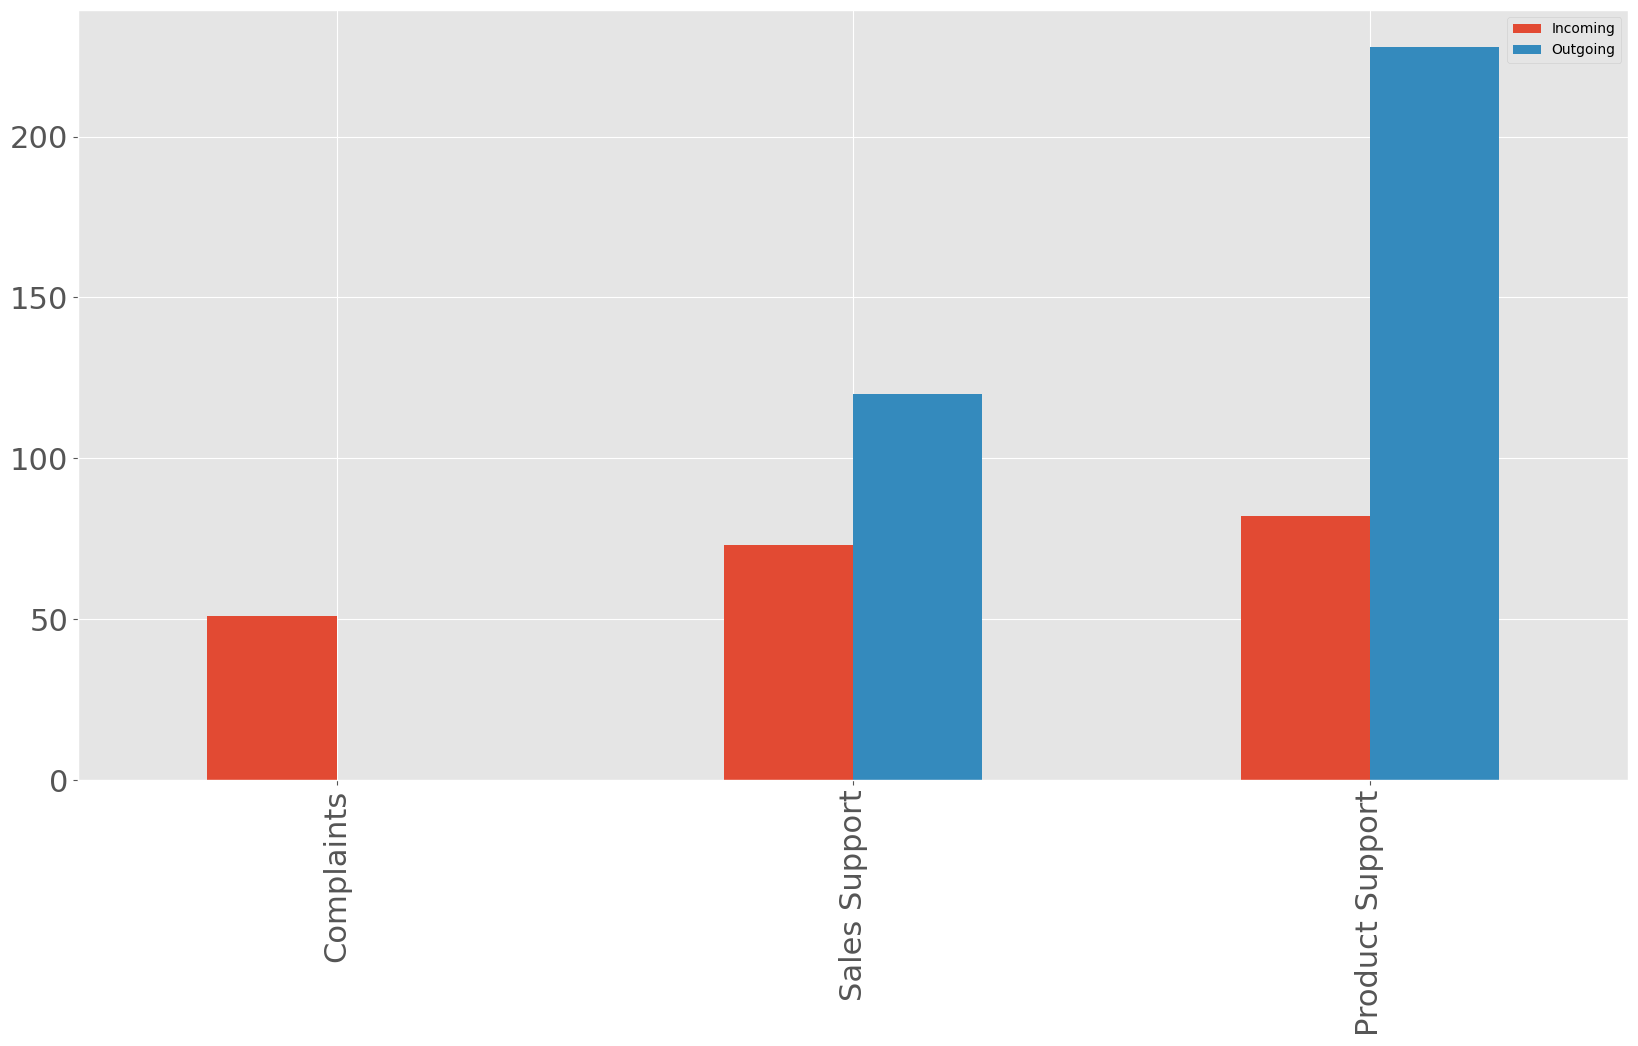

In [916]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

#purpose_group = df.groupby("Call Purpose")

call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = df.groupby("Call Purpose")["Incoming or Outgoing"].value_counts()

print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
print(complaints)

sales_support = purpose_counts["Sales Support"].to_dict()
print(sales_support)
product_support = purpose_counts["Product Support"].to_dict()

print(product_support)
#Your Code Here:

# support_df = pd.DataFrame({'Incoming':purpose_counts.filter(like='Incoming', axis=0),
#                           'Outgoing':purpose_counts.filter(like='Outgoing', axis=0)},index=call_purpose)
# support_df

support_df = pd.DataFrame({'Complaints': pd.Series(complaints), 'Sales Support': pd.Series(sales_support), 
                   'Product Support': pd.Series(product_support) })
support_df.fillna(0,inplace=True)
support_df=support_df.swapaxes("index", "columns")
support_df.plot(kind='bar',fontsize=22)



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: South branch is operating more efficiently.Abandonment rate, service level and average speed of answer metrics are better for South branch compared with North branch.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Based on Average Busy Minutes, Average Not Ready Minutes, Average Incoming Wait Time, Average During Call Wait Time metrics calculated above determines that South call center will benefit by extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used Bar graph, because I can see the call counts of incoming and outgoing side by side for easy comparison.

    Time Block     Call Purpose Incoming or Outgoing  Calls
0      9:00 AM        Complaint             Incoming      1
1     11:00 AM    Sales Support             Incoming      1
2     11:00 AM    Sales Support             Incoming      1
3      4:00 PM    Sales Support             Incoming      1
4     12:00 PM  Product Support             Incoming      1
..         ...              ...                  ...    ...
549    5:00 PM  Product Support             Outgoing      1
550    5:00 PM  Product Support             Outgoing      1
551    5:00 PM  Product Support             Outgoing      1
552    5:00 PM  Product Support             Outgoing      1
553    5:00 PM  Product Support             Outgoing      1

[554 rows x 4 columns]
                                 Calls
Time Block Incoming or Outgoing       
10:00 AM   Outgoing                 65
           Incoming                 33
11:00 AM   Outgoing                 36
           Incoming                 19
12:00 PM   Outgoing   

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\1305057187.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  call_times_grouped = call_times.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])


<Axes: title={'center': 'Total Incoming and Outgoing Calls Count by Time Block'}, xlabel='Time Block', ylabel='Calls Attended'>

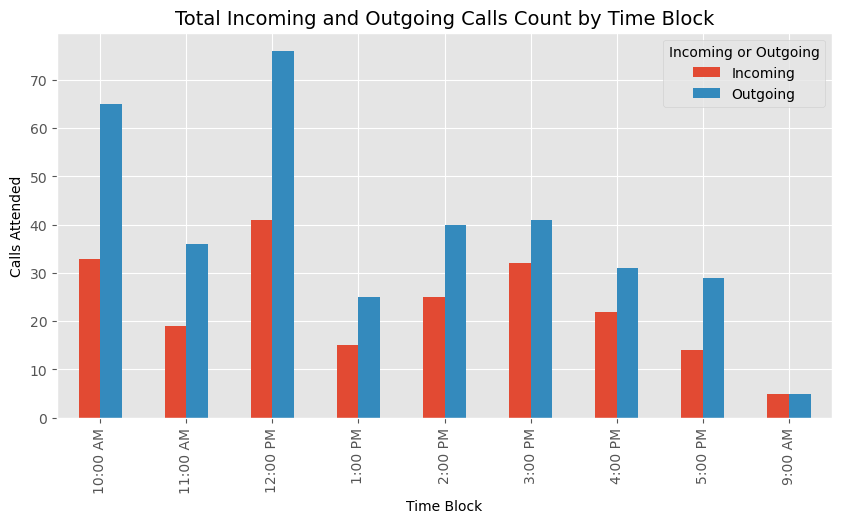

In [881]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
print(call_times)
call_times_grouped = call_times.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])
print(call_times_grouped)
pivot = pd.pivot_table(data=call_times_grouped, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
pt=pivot.plot.bar()
pt.set_title('Total Incoming and Outgoing Calls Count by Time Block', fontsize=14)
pt.set_xlabel('Time Block')
pt.set_ylabel('Calls Attended')
pt

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

In [873]:
df_group_by=call_times.groupby('Call Purpose')
df_group_by
df_group_by_complaints=df_group_by.get_group('Complaint')
df_group_by_complaints

Time Block Call Purpose Incoming or Outgoing  Calls
0      9:00 AM    Complaint             Incoming      1
13     9:00 AM    Complaint             Incoming      1
14    12:00 PM    Complaint             Incoming      1
15     1:00 PM    Complaint             Incoming      1
16     3:00 PM    Complaint             Incoming      1
17     2:00 PM    Complaint             Incoming      1
32    12:00 PM    Complaint             Incoming      1
44     2:00 PM    Complaint             Incoming      1
60     9:00 AM    Complaint             Incoming      1
61    10:00 AM    Complaint             Incoming      1
62    12:00 PM    Complaint             Incoming      1
63     5:00 PM    Complaint             Incoming      1
78    10:00 AM    Complaint             Incoming      1
79    12:00 PM    Complaint             Incoming      1
80     5:00 PM    Complaint             Incoming      1
258   11:00 AM    Complaint             Incoming      1
259   12:00 PM    Complaint             Incoming      1
260    1:00 PM    Complaint             Incoming      1
261    1:00 PM    Complaint             Incoming      1
262    5:00 PM    Complaint             Incoming      1
263   12:00 PM    Complaint             Incoming      1
279    9:00 AM    Complaint             Incoming      1
280   10:00 AM    Complaint             Incoming      1
281   12:00 PM    Complaint             Incoming      1
282   12:00 PM    Complaint             Incoming      1
283   12:00 PM    Complaint             Incoming      1
284    1:00 PM    Complaint             Incoming      1
285    1:00 PM    Complaint             Incoming      1
286    2:00 PM    Complaint             Incoming      1
287    3:00 PM    Complaint             Incoming      1
288    3:00 PM    Complaint             Incoming      1
289    3:00 PM    Complaint             Incoming      1
290    5:00 PM    Complaint             Incoming      1
314   10:00 AM    Complaint             Incoming      1
315   10:00 AM    Complaint             Incoming      1
316   12:00 PM    Complaint             Incoming      1
317    3:00 PM    Complaint             Incoming      1
318    5:00 PM    Complaint             Incoming      1
319    4:00 PM    Complaint             Incoming      1
345   11:00 AM    Complaint             Incoming      1
346   12:00 PM    Complaint             Incoming      1
347    2:00 PM    Complaint             Incoming      1
348    4:00 PM    Complaint             Incoming      1
360    9:00 AM    Complaint             Incoming      1
361   10:00 AM    Complaint             Incoming      1
362   11:00 AM    Complaint             Incoming      1
363    1:00 PM    Complaint             Incoming      1
364    2:00 PM    Complaint             Incoming      1
365    3:00 PM    Complaint             Incoming      1
366    4:00 PM    Complaint             Incoming      1
367    5:00 PM    Complaint             Incoming      1

In [875]:
df_group_by_complaints_groupby = df_group_by_complaints.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])
df_group_by_complaints_groupby 

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\185956022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_by_complaints_groupby = df_group_by_complaints.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])


Calls
Time Block Incoming or Outgoing       
10:00 AM   Incoming                  6
11:00 AM   Incoming                  3
12:00 PM   Incoming                 11
1:00 PM    Incoming                  6
2:00 PM    Incoming                  5
3:00 PM    Incoming                  6
4:00 PM    Incoming                  3
5:00 PM    Incoming                  6
9:00 AM    Incoming                  5

<Axes: title={'center': 'Incoming and Outgoing Calls by Time Block: Complaints'}, xlabel='Time Block', ylabel='Calls Attended'>

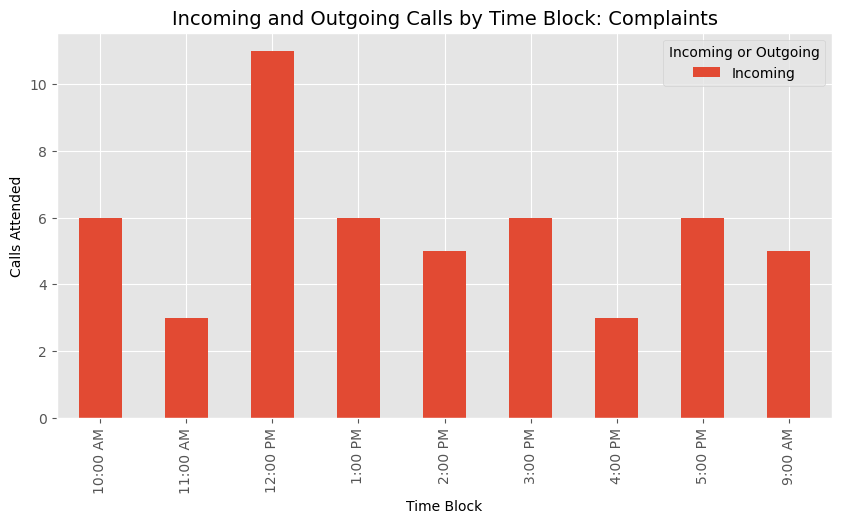

In [882]:
pivot = pd.pivot_table(data=df_group_by_complaints_groupby, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
cs = pivot.plot.bar()
cs.set_title('Incoming and Outgoing Calls by Time Block: Complaints', fontsize=14)
cs.set_xlabel('Time Block')
cs.set_ylabel('Calls Attended')
cs


In [883]:
df_group_by_call_purpose=call_times.groupby('Call Purpose')
df_group_by_call_purpose
df_group_by_sales_support=df_group_by.get_group('Sales Support')
df_group_by_sales_support

Time Block   Call Purpose Incoming or Outgoing  Calls
1     11:00 AM  Sales Support             Incoming      1
2     11:00 AM  Sales Support             Incoming      1
3      4:00 PM  Sales Support             Incoming      1
18    10:00 AM  Sales Support             Incoming      1
19    10:00 AM  Sales Support             Incoming      1
..         ...            ...                  ...    ...
439    3:00 PM  Sales Support             Outgoing      1
440    4:00 PM  Sales Support             Outgoing      1
441    4:00 PM  Sales Support             Outgoing      1
442    5:00 PM  Sales Support             Outgoing      1
443    5:00 PM  Sales Support             Outgoing      1

[193 rows x 4 columns]

In [885]:
df_group_by_sales_support_groupby = df_group_by_sales_support.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])
df_group_by_sales_support_groupby

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\2726477269.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_by_sales_support_groupby = df_group_by_sales_support.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])


Calls
Time Block Incoming or Outgoing       
10:00 AM   Outgoing                 48
           Incoming                 24
11:00 AM   Outgoing                 17
           Incoming                  9
12:00 PM   Outgoing                 25
           Incoming                 21
1:00 PM    Outgoing                 11
           Incoming                  7
2:00 PM    Outgoing                  6
           Incoming                  4
3:00 PM    Outgoing                  3
           Incoming                  3
4:00 PM    Outgoing                  5
           Incoming                  5
5:00 PM    Outgoing                  5

<Axes: title={'center': 'Incoming and Outgoing Calls by Time Block: Sales Support'}, xlabel='Time Block', ylabel='Calls Attended'>

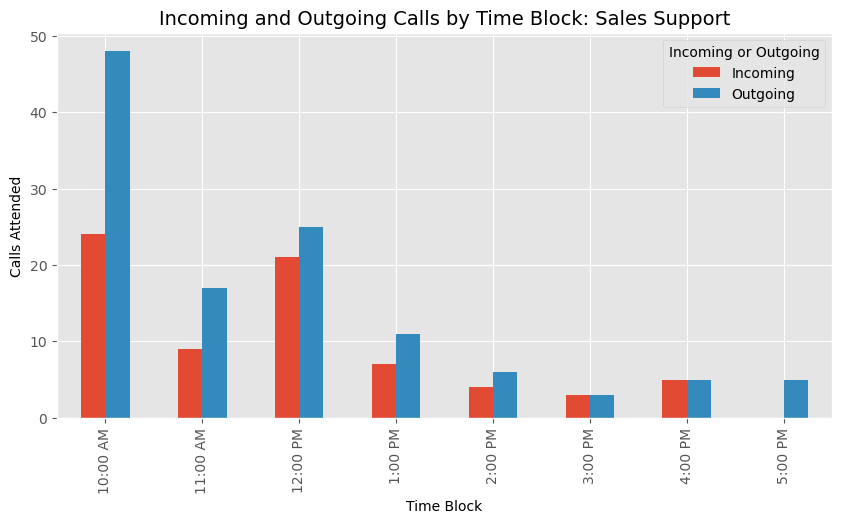

In [902]:
pivot = pd.pivot_table(data=df_group_by_sales_support_groupby, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
cs = pivot.plot.bar()
cs.set_title('Incoming and Outgoing Calls by Time Block: Sales Support', fontsize=14)
cs.set_xlabel('Time Block')
cs.set_ylabel('Calls Attended')
cs

In [901]:
df_group_by_callpurpose=call_times.groupby('Call Purpose')
df_group_by_callpurpose
df_group_by_product_support=df_group_by.get_group('Product Support')
df_group_by_product_support

Time Block     Call Purpose Incoming or Outgoing  Calls
4     12:00 PM  Product Support             Incoming      1
5      2:00 PM  Product Support             Incoming      1
6      2:00 PM  Product Support             Incoming      1
7      2:00 PM  Product Support             Incoming      1
8      3:00 PM  Product Support             Incoming      1
..         ...              ...                  ...    ...
549    5:00 PM  Product Support             Outgoing      1
550    5:00 PM  Product Support             Outgoing      1
551    5:00 PM  Product Support             Outgoing      1
552    5:00 PM  Product Support             Outgoing      1
553    5:00 PM  Product Support             Outgoing      1

[310 rows x 4 columns]

In [896]:
df_group_by_product_support_groupby = df_group_by_product_support.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])
df_group_by_product_support_groupby

C:\Users\Prasad\AppData\Local\Temp\ipykernel_16472\312085899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_by_product_support_groupby = df_group_by_product_support.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'],ascending=[True, False])


Calls
Time Block Incoming or Outgoing       
10:00 AM   Outgoing                 17
           Incoming                  3
11:00 AM   Outgoing                 19
           Incoming                  7
12:00 PM   Outgoing                 51
           Incoming                  9
1:00 PM    Outgoing                 14
           Incoming                  2
2:00 PM    Outgoing                 34
           Incoming                 16
3:00 PM    Outgoing                 38
           Incoming                 23
4:00 PM    Outgoing                 26
           Incoming                 14
5:00 PM    Outgoing                 24
           Incoming                  8
9:00 AM    Outgoing                  5

<Axes: title={'center': 'Incoming and Outgoing Calls by Time Block: Product Support'}, xlabel='Time Block', ylabel='Calls Attended'>

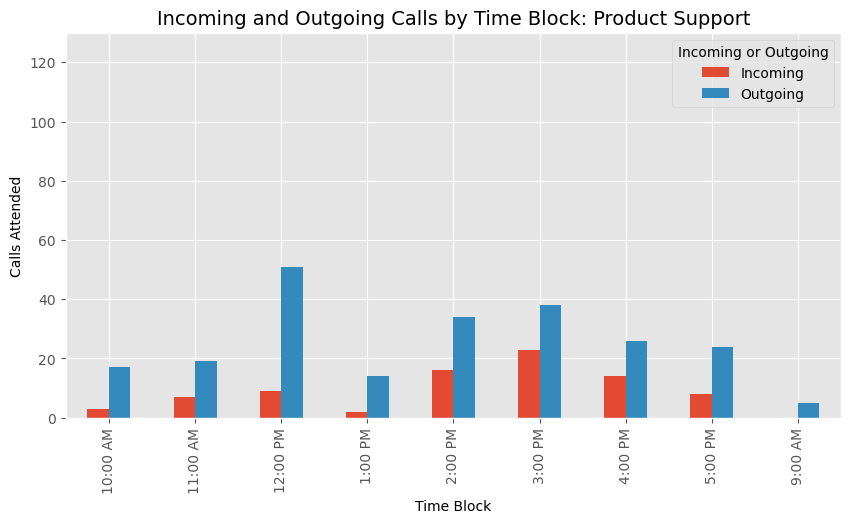

In [903]:
pivot = pd.pivot_table(data=df_group_by_product_support_groupby, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
cs = pivot.plot.bar()
cs.set_title('Incoming and Outgoing Calls by Time Block: Product Support', fontsize=14)
cs.set_xlabel('Time Block')
cs.set_ylabel('Calls Attended')
cs.set_ylim(0,130)
cs